<a href="https://colab.research.google.com/github/rezwanjoy/Fake-News-Detection-Using-LSTM/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing import sequence
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
fake = pd.read_csv('Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
                                            fake


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

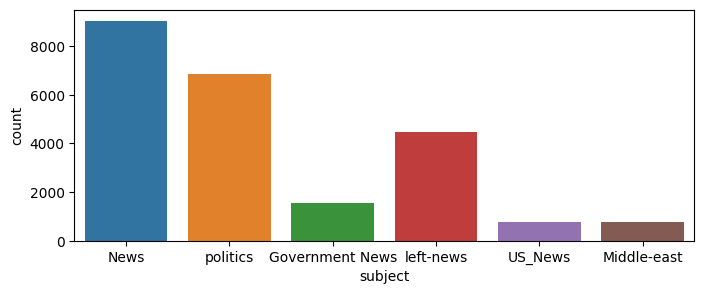

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x = 'subject', data=fake)

In [ ]:
text = ', '.join(fake['text'].tolist())

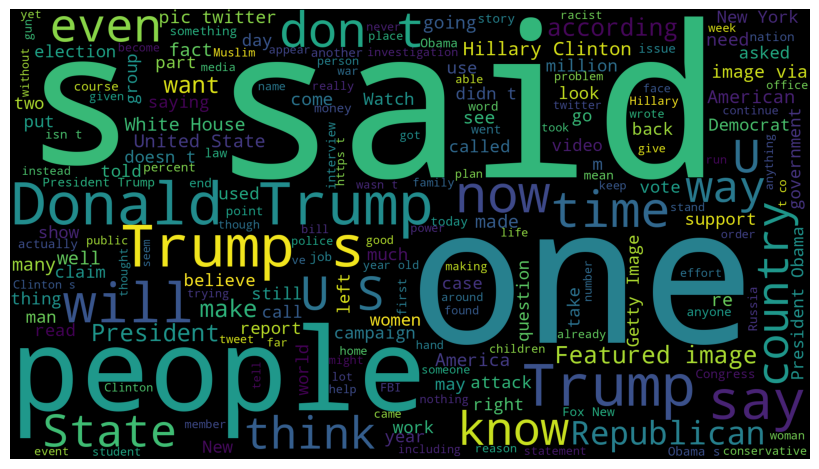

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real = pd.read_csv('True.csv')

In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

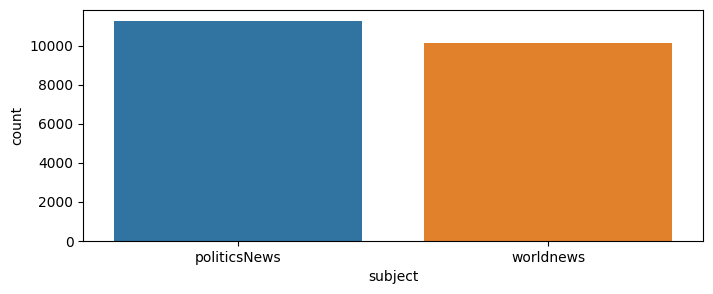

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x = 'subject', data=real)

In [ ]:
text = ', '.join(real['text'].tolist())

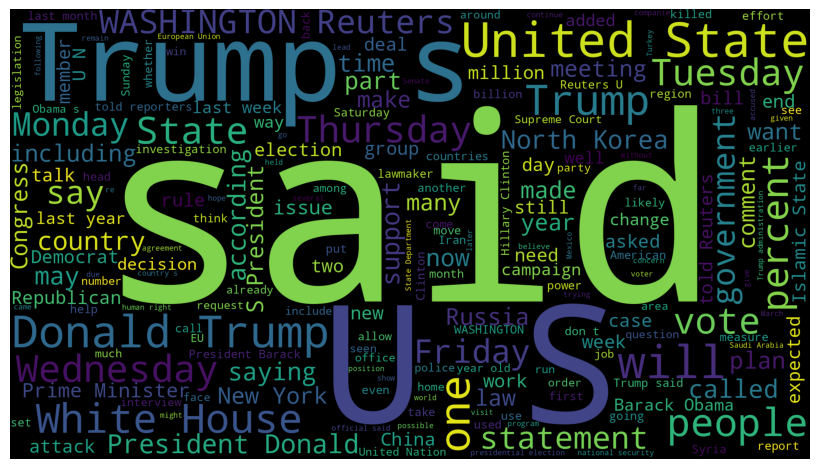

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.sample(5)

,title,text,subject,date
11982,Powerful Afghan regional leader ousted as poli...,KABUL (Reuters) - One of Afghanistan s most po...,worldnews,"December 18, 2017"
1649,Trump campaign manager Manafort offered to bri...,"WASHINGTON (Reuters) - Paul Manafort, Presiden...",politicsNews,"September 20, 2017"
11151,EPA actions in Flint water crisis to be examin...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 21, 2016"
3635,"Trump's budget depends on strong growth, 'feed...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"May 23, 2017"
20655,"Children, teenagers among wounded Rohingya in ...","CHITTAGONG, Bangladesh (Reuters) - Mohammed Id...",worldnews,"September 7, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text', 'class']]

In [ ]:
fake = fake[['text', 'class']]

In [ ]:
data = real.append(fake, ignore_index=True)

<ipython-input-35-45d5ced910ac>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [ ]:
data.sample(5)

,text,class
13441,more than 400 u.s. troops leaving syria: coali...,1
37153,[video] baltimore mayor to police: “let them l...,0
44352,russian street preacher vs. american students ...,0
15022,"seven dead in concert attack, reprisals in cen...",1
34173,one million democrats switched to trump and he...,0


In [ ]:
data = data[['text', 'class']]

In [ ]:
data.dropna()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
44892,mcpain: john mccain furious that iran treated ...,0
44893,justice? yahoo settles e-mail privacy class-ac...,0
44894,sunnistan: us and allied ‘safe zone’ plan to t...,0
44895,how to blow $700 million: al jazeera america f...,0


In [ ]:
data.to_csv('train.csv', index=False)

In [ ]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

In [ ]:
data['cleaned_text'] = data['text'].apply(clean_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['class'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
print(X_train_tfidf)

  (0, 81763)	0.017019268050258437
  (0, 75159)	0.012362697769568033
  (0, 10025)	0.012991812930238912
  (0, 32652)	0.029792262505829815
  (0, 105726)	0.022788898217480483
  (0, 100490)	0.02155912023016798
  (0, 25925)	0.02044938930312127
  (0, 78108)	0.02564529216238667
  (0, 111394)	0.05027322591012365
  (0, 29456)	0.04966451506087379
  (0, 31760)	0.0218902178598503
  (0, 38646)	0.022607155662399223
  (0, 46995)	0.044991869795594816
  (0, 58880)	0.021100871337653867
  (0, 86588)	0.012511696760932929
  (0, 103631)	0.019726685048110457
  (0, 64304)	0.010040782951181826
  (0, 32941)	0.019303465013611493
  (0, 52277)	0.021277494515052203
  (0, 90457)	0.02113335931704226
  (0, 51884)	0.01465166079595159
  (0, 86674)	0.012033320219110306
  (0, 12112)	0.030280038967546392
  (0, 85359)	0.016287934492437192
  (0, 107870)	0.008424099826756987
  :	:
  (35916, 50259)	0.019208694465269766
  (35916, 110062)	0.01612156395606025
  (35916, 52038)	0.018053076389305395
  (35916, 99923)	0.117315955757189

In [ ]:
print(X_test_tfidf)

  (0, 110990)	0.21530055997954164
  (0, 110989)	0.44370684920886344
  (0, 110463)	0.023789419891737704
  (0, 110074)	0.01864247987683392
  (0, 109055)	0.02582791196809102
  (0, 108923)	0.03336958818431585
  (0, 108593)	0.028741274496880576
  (0, 108410)	0.05686080581667667
  (0, 108227)	0.013203103093922502
  (0, 108054)	0.028178283226041167
  (0, 108016)	0.03448004120879237
  (0, 107864)	0.054675455161052405
  (0, 107840)	0.028767920957964398
  (0, 107601)	0.01428024432762547
  (0, 107538)	0.06150100385621781
  (0, 107527)	0.05979465117183069
  (0, 107395)	0.027801731936142937
  (0, 107365)	0.021747255666376877
  (0, 107242)	0.012993951197651408
  (0, 106938)	0.01031430272900774
  (0, 106257)	0.050140583817338005
  (0, 106234)	0.09073750410216275
  (0, 106222)	0.031244923101672928
  (0, 106218)	0.022680136232233392
  (0, 106127)	0.059868915466966426
  :	:
  (8979, 38814)	0.11399137137605071
  (8979, 37157)	0.09547867493952637
  (8979, 37139)	0.3810561356241344
  (8979, 36422)	0.072484

In [ ]:
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train_seq)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(X_test_seq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
max_seq_length = 300
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_seq = sequence.pad_sequences(X_test_seq, maxlen=max_seq_length)

In [ ]:
embedding_dim = 128
lstm_units = 64
dropout = 0.5

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_seq_length))
model.add(LSTM(lstm_units, dropout=dropout))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_seq_length))
model.add(LSTM(lstm_units, dropout=dropout, return_sequences=True))
model.add(LSTM(lstm_units, dropout=dropout, return_sequences=True))
model.add(LSTM(lstm_units, dropout=dropout, return_sequences=True))
model.add(LSTM(lstm_units, dropout=dropout))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_seq_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(lstm_units, dropout=dropout))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 5
history = model.fit(X_train_seq, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_seq, y_test))

Epoch 1/5
1123/1123 [==============================] - 122s 96ms/step - loss: 0.1017 - accuracy: 0.9597 - val_loss: 0.0510 - val_accuracy: 0.9830
Epoch 2/5
1123/1123 [==============================] - 27s 24ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 3/5
1123/1123 [==============================] - 18s 16ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0400 - val_accuracy: 0.9878
Epoch 4/5
1123/1123 [==============================] - 20s 18ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.0429 - val_accuracy: 0.9891
Epoch 5/5
1123/1123 [==============================] - 14s 13ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0534 - val_accuracy: 0.9870


In [ ]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print("Accuracy:", accuracy)

281/281 [==============================] - 1s 5ms/step - loss: 0.0534 - accuracy: 0.9870
Accuracy: 0.9869710206985474


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

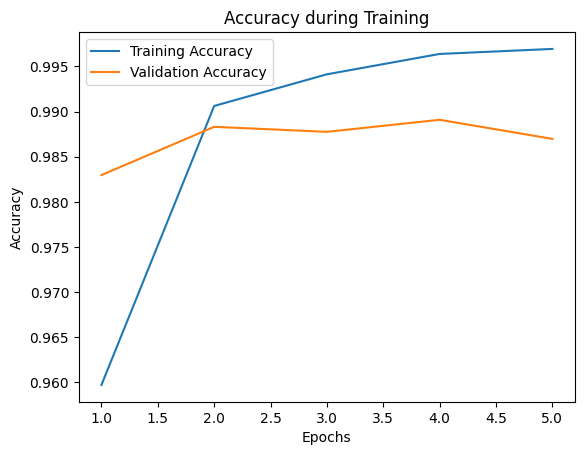

In [ ]:
plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

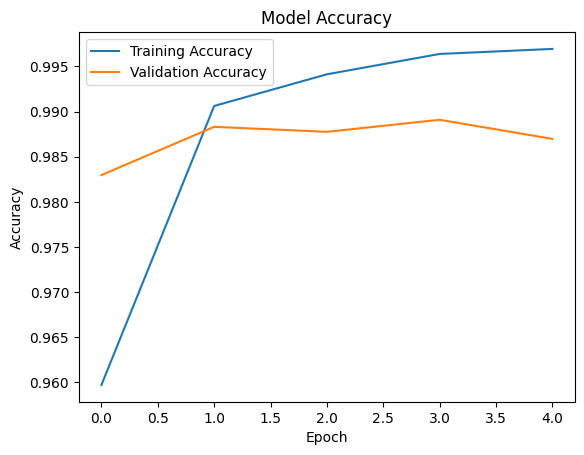

In [ ]:
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

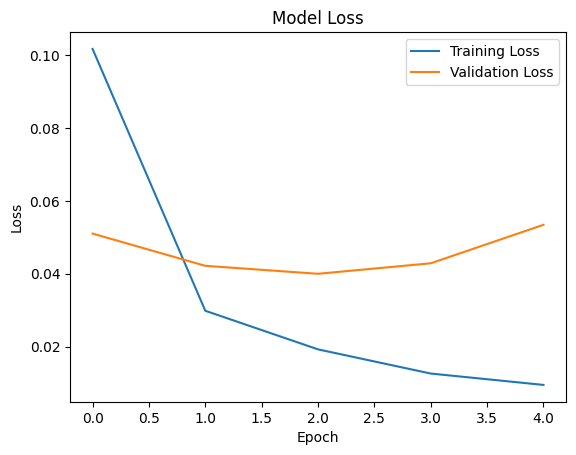

In [ ]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test_seq)
y_pred = np.round(y_pred_prob).flatten()

281/281 [==============================] - 1s 3ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9869710467706013
Precision: 0.9806334016860333
Recall: 0.992619926199262
F1 Score: 0.9865902578796562


In [ ]:
# Initialize classifiers
naive_bayes = MultinomialNB()
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC()

In [ ]:
# Fit classifiers on TF-IDF vectors
naive_bayes.fit(X_train_tfidf, y_train)
logistic_regression.fit(X_train_tfidf, y_train)
random_forest.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
# Predict the labels for the testing data using classifiers
nb_pred = naive_bayes.predict(X_test_tfidf)
lr_pred = logistic_regression.predict(X_test_tfidf)
rf_pred = random_forest.predict(X_test_tfidf)
svm_pred = svm.predict(X_test_tfidf)

In [ ]:
# Calculate the evaluation metrics for classifiers
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [ ]:
nb_precision = precision_score(y_test, nb_pred)
lr_precision = precision_score(y_test, lr_pred)
rf_precision = precision_score(y_test, rf_pred)
svm_precision = precision_score(y_test, svm_pred)

In [ ]:
nb_recall = recall_score(y_test, nb_pred)
lr_recall = recall_score(y_test, lr_pred)
rf_recall = recall_score(y_test, rf_pred)
svm_recall = recall_score(y_test, svm_pred)

In [ ]:
nb_f1 = f1_score(y_test, nb_pred)
lr_f1 = f1_score(y_test, lr_pred)
rf_f1 = f1_score(y_test, rf_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [ ]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1 Score:", nb_f1)

Naive Bayes Accuracy: 0.9341870824053452
Naive Bayes Precision: 0.9461520133428639
Naive Bayes Recall: 0.9158210332103321
Naive Bayes F1 Score: 0.9307394820110161


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [nb_accuracy, nb_precision, nb_recall, nb_f1]

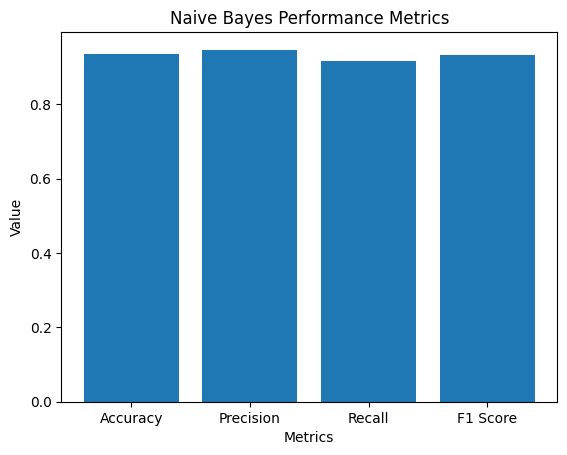

In [ ]:
plt.bar(metrics, values)
plt.title('Naive Bayes Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1 Score:", lr_f1)

Logistic Regression Accuracy: 0.9819599109131403
Logistic Regression Precision: 0.9767016902695295
Logistic Regression Recall: 0.9861623616236163
Logistic Regression F1 Score: 0.9814092265320175


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [lr_accuracy, lr_precision, lr_recall, lr_f1]

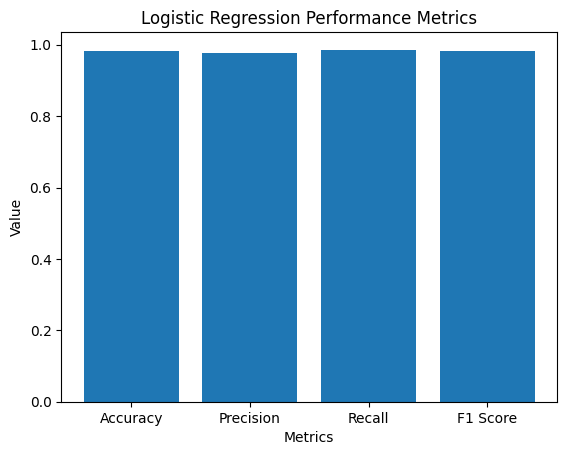

In [ ]:
plt.bar(metrics, values)
plt.title('Logistic Regression Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

Random Forest Accuracy: 0.9824053452115813
Random Forest Precision: 0.9844619666048238
Random Forest Recall: 0.9790129151291513
Random Forest F1 Score: 0.9817298797409807


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

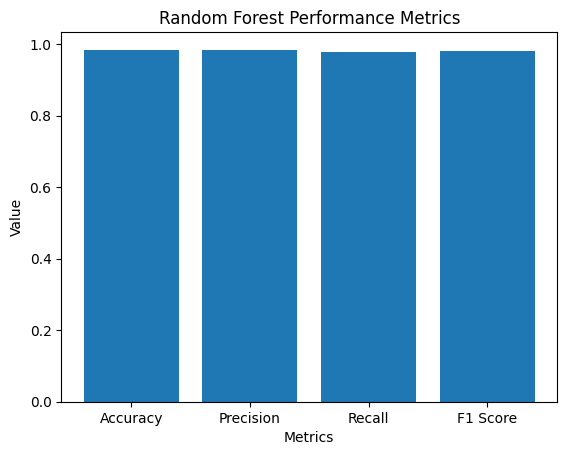

In [ ]:
plt.bar(metrics, values)
plt.title('Random Forest Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.9904231625835189
SVM Precision: 0.9885057471264368
SVM Recall: 0.9916974169741697
SVM F1 Score: 0.9900990099009902


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [svm_accuracy, svm_precision, svm_recall, svm_f1]

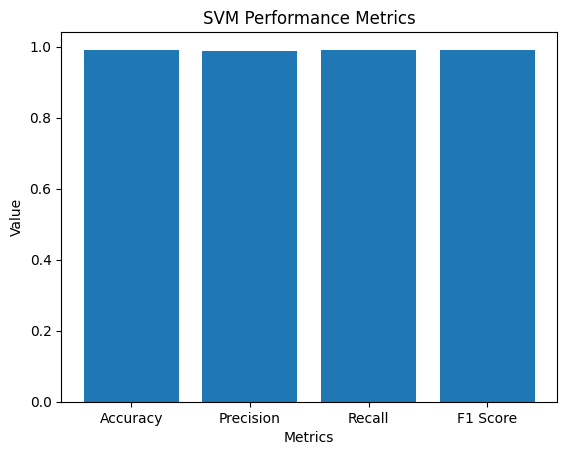

In [ ]:
plt.bar(metrics, values)
plt.title('SVM Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
classifiers = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'SVM']
accuracy_scores = [nb_accuracy, lr_accuracy, rf_accuracy, svm_accuracy]

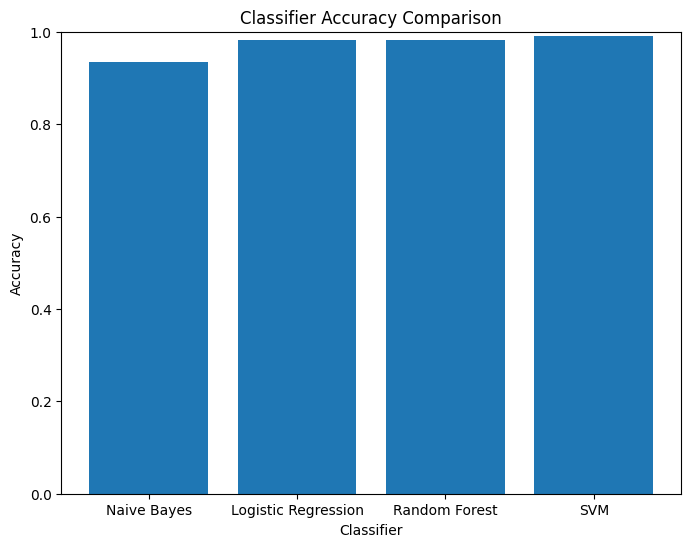

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test_seq)

# Convert predicted probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

281/281 [==============================] - 1s 4ms/step
Confusion Matrix:
[[4559   85]
 [  32 4304]]


In [ ]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print("Overall Accuracy: {:.2f}%".format(accuracy * 100))

281/281 [==============================] - 2s 6ms/step - loss: 0.0534 - accuracy: 0.9870
Overall Accuracy: 98.70%


In [ ]:
cleaned_text = clean_text("Since the SARS-CoV-2 virus first emerged in Wuhan, China in late 2019, its genetic material has experienced numerous changes, some of which have altered how easily it is transmitted, the severity of disease it causes and the performance of COVID-19 vaccines, diagnostics and treatments against it. These changes, or mutations, occur when a virus replicates or makes copies of itself. A virus that has mutated in this way is referred to as a variant.")

preprocessed_text = tokenizer.texts_to_sequences([cleaned_text])
preprocessed_text = sequence.pad_sequences(preprocessed_text, maxlen=max_seq_length)

# Make prediction on the preprocessed text
prediction = model.predict(preprocessed_text)

# Interpret the prediction
if prediction > 0.5:
    print("The text article is classified as 'real'.")
else:
    print("The text article is classified as 'fake'.")

1/1 [==============================] - 0s 71ms/step
The text article is classified as 'real'.


In [ ]:
preprocessed_text_vectorized = vectorizer.transform(["Since the illegal annexation of the Crimean Peninsula and the start of the conflict in eastern Ukraine in 2014, relations between Russia and the West deteriorated significantly. As was repeatedly proven, Russia continually tried to apply various tools to distract, dismay and divide Western allies. One of the most frequently discussed means is using various forms of propaganda (including disinformation) to manipulate audiences in Western and Central Europe."])

# Predict the class label
predicted_class = naive_bayes.predict(preprocessed_text_vectorized)

# Interpret the prediction
if predicted_class == 1:
    print("The news article is classified as 'real'.")
else:
    print("The news article is classified as 'fake'.")

The news article is classified as 'real'.
